# Table of Contents

1. **[Project Background](#1)**
2. **[Data Cleaning](#2)**
3. **[Exploratory Data Analysis](#3)**
4. **[Data Visualization](#4)**
5. **[Machine Learning: Classification](#5)**
6. **[Machine Learning: Regression](#6)**
7. **[Conclusion & Recommendations](#7)**

# Part 1. Project Background

Nowadays, marketing spending in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

### Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans. 

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers. 

# Part 2. Data Cleaning <a id="2"></a>

![clean](https://www.geeksforgeeks.org/wp-content/uploads/ml.png)

## Load the raw data

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [1]:

import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

import ydata_profiling as pp
import warnings
warnings.filterwarnings('ignore')


linkname = 'bank_cleaned.csv'
dataset1 = pd.read_csv(linkname)

There are 41,188 observations in this dataset. Each represents an existing customer that the bank reached via phone calls. 
* For each observation, the dataset records **16 input variables** that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts. 
* There is **a single binary output variable** that denotes “yes” or “no” revealing the outcomes of the phone calls.

In [2]:
# View the first 5 rows in the dataset
dataset1.head()

Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           5   35    management  married   tertiary      no      231     yes   
4           6   28    management   single   tertiary      no      447     yes   

  loan  day month  duration  campaign  pdays  previous poutcome response  \
0   no    5   may      4.35         1     -1         0  unknown       no   
1   no    5   may      2.52         1     -1         0  unknown       no   
2  yes    5   may      1.27         1     -1         0  unknown       no   
3   no    5   may      2.32         1     -1         0  unknown       no   
4  yes    5   may      3.62         1     -1         0  unknown       no   

   response_binary  
0                0  
1                0  
2                0  
3                0  
4                0

## Clean the dataset

### 2.1 Deal with missing data

There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset. 

In [3]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = dataset1.poutcome == 'other'
dataset2 = dataset1.drop(dataset1[condition].index, axis = 0, inplace = False)

In [4]:
# Step 2: Replace 'unknown' in job and education with 'other'
dataset2[['job','education']] = dataset2[['job','education']].replace(['unknown'],'other')

### 2.2 Drop outliers in the column 'balance'

In order to capture the general trend in the dataset, outliers in the column “balance” are dropped. Outliers are defined as the values which are more than three standard deviations away from the mean.
In sum, 2556 rows of data were removed.

In [5]:
from scipy.stats import zscore

dataset2[['balance']].mean()
dataset2[['balance']].mean()

dataset2['balance_outliers'] = dataset2['balance']
dataset2['balance_outliers']= zscore(dataset2['balance_outliers'])

condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3 )
dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)

In [6]:
dataset4 = dataset3.drop('balance_outliers', axis=1)

### 2.3 Creating and transforming data

Some changes were made to the column name, units and data types for easier analysis.

In [7]:
# Step 1: Change column name: 'y' to 'response'
dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset4[new_column].value_counts()

convert(dataset4, "response_binary", "response")

0    35224
1     4482
Name: response_binary, dtype: int64

In [8]:
dataset4.head()

Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           5   35    management  married   tertiary      no      231     yes   
4           6   28    management   single   tertiary      no      447     yes   

  loan  day month  duration  campaign  pdays  previous poutcome response  \
0   no    5   may      4.35         1     -1         0  unknown       no   
1   no    5   may      2.52         1     -1         0  unknown       no   
2  yes    5   may      1.27         1     -1         0  unknown       no   
3   no    5   may      2.32         1     -1         0  unknown       no   
4  yes    5   may      3.62         1     -1         0  unknown       no   

   response_binary  
0                0  
1                0  
2                0  
3                0  
4                0

In [9]:
dataset5=dataset4

In [10]:
# Step 3: Change the unit of 'duration' from seconds to minutes
dataset5['duration'] = dataset5['duration'].apply(lambda n:n/60).round(2)

In [11]:
# Step 4: Change 'month' from words to numbers for easier analysis
lst = [dataset5]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

### 2.4 Filtering

In [12]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (dataset5['duration']<5/60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)

In [13]:
# Step 2: Drop customer values with 'other' education
condition3 = (dataset6['education'] == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis = 0, inplace = False)

In [14]:
pp.ProfileReport(dataset1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Part 3. Exploratory Data Analysis <a id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

<img src='https://static.wixstatic.com/media/e42cce_756b090fe40548eda9148fd5599980bb~mv2.gif' width='450'>

### 3.1 Visualize the distribution of 'age' and 'balance'

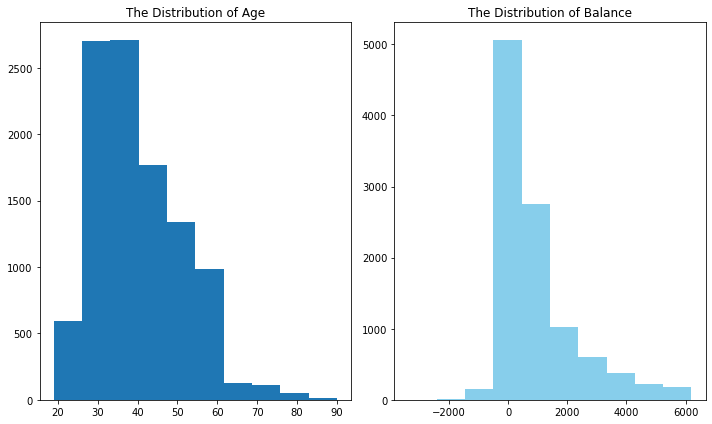

In [15]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset7['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(dataset7['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

**The distribution of age**: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

**The distribution of balance**: After dropping outliers in balance, the range of balance is still massive, from a minimum of -6847 to a maximum of 10443 euros, giving a range of 17290 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels. 

### 3.2 Visualize the relationship between 'age' and 'balance' 

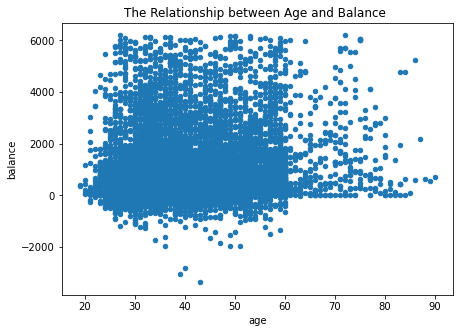

In [16]:
scatter_age_balance = dataset7.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Based on this scatter plot, there is no clear relationship between client’s age and balance level. 

Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

### 3.3 Visualize the distribution of 'duration' & 'campaign'

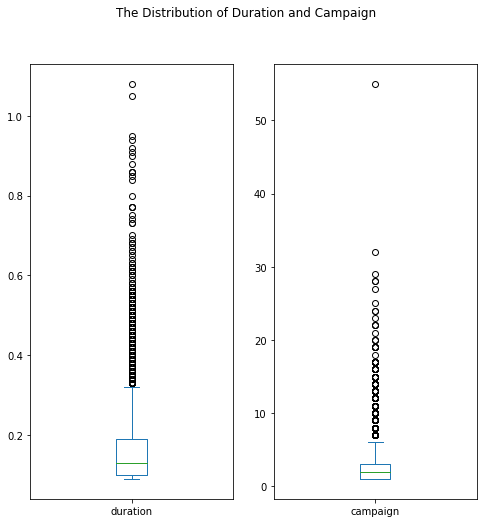

In [17]:
dist_dur_cam = dataset7[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

**The distribution of duration**: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

**The distribution of campagin**: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact. 

### 3.4 Visualize the relationship between 'duration' & 'campaign': with response result 

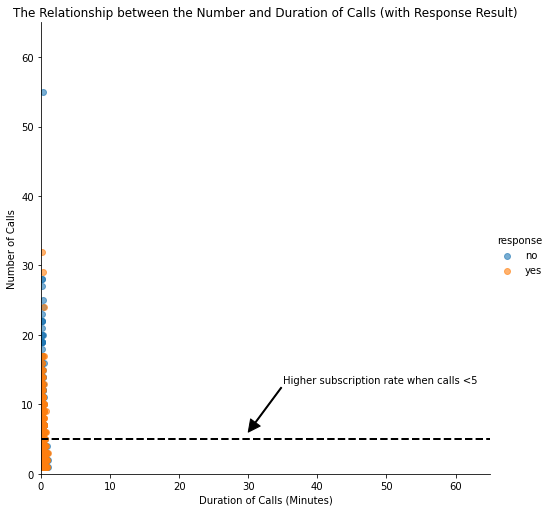

In [18]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset7,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times. 

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

### 3.5 Scatter matrix and Correlation matrix

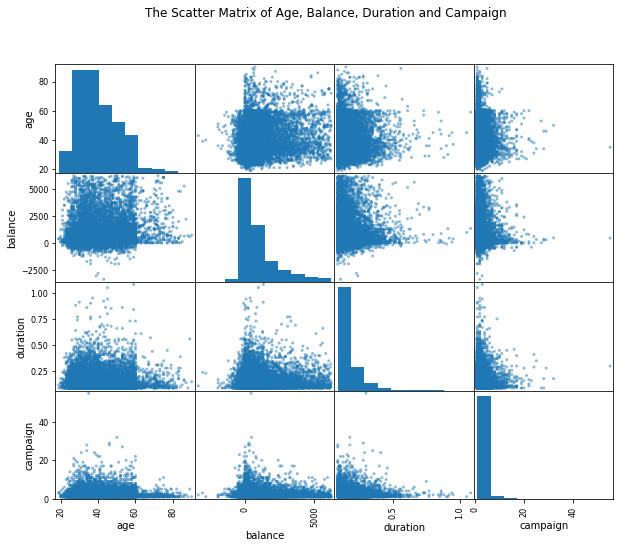

In [19]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset7[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

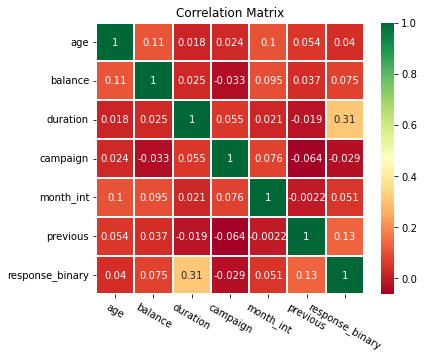

In [20]:
corr_data = dataset7[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign. 

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

# Part 4. Data Visualization <a id="4"></a>

With a sound knowledge of the distribution of key variables, further analysis of each customer characteristic can be carried out to investigate its influence on the subscription rate. 

![qwe](https://media3.giphy.com/media/l378c04F2fjeZ7vH2/giphy.gif)

### 4.1 Visualize the subscription and contact rate by age

In [21]:
lst = [dataset7]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [22]:
count_age_response_pct = pd.crosstab(dataset7['response'],dataset7['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [23]:
# dataset7['age_group']

age = pd.DataFrame(dataset7['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

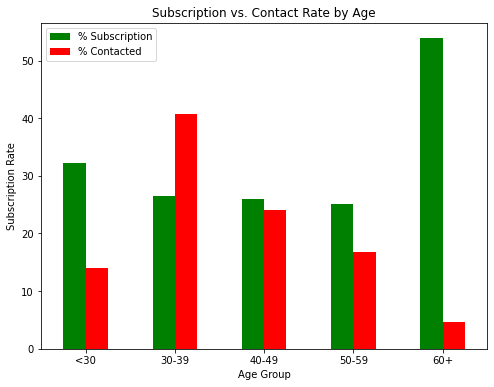

In [24]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

**Insights: target the youngest and the oldest instead of the middle-aged**

Green vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients. 

* It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest. 


* The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

However, red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future. 

### 4.2 Visualize the subscription rate by balance level

In [25]:
lst = [dataset7]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [26]:
count_balance_response_pct = pd.crosstab(dataset7['response'],dataset7['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [27]:
bal = pd.DataFrame(dataset7['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

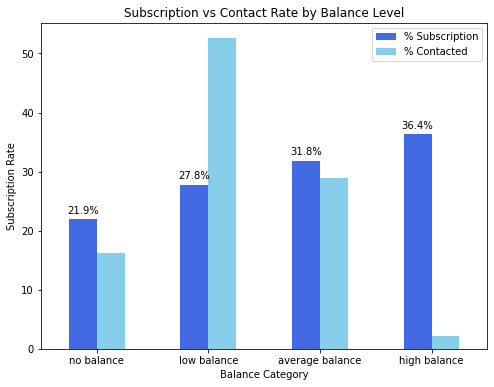

In [28]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

**Insights: target clients with average or high balance** 

To identify the trend more easily, clients are categorized into four groups based on their levels of balance: 
* No Balance: clients with a negative balance.
* Low Balance: clients with a balance between 0 and 1000 euros
* Average Balance: clients with a balance between 1000 and 5000 euros.
* High Balance: clients with a balance greater than 5000 euros.


Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, nearly 15%. 

However, in this campaign, more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits. 

### 4.3 Visualize the subscription rate by age and balance

In [29]:
age_balance1 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

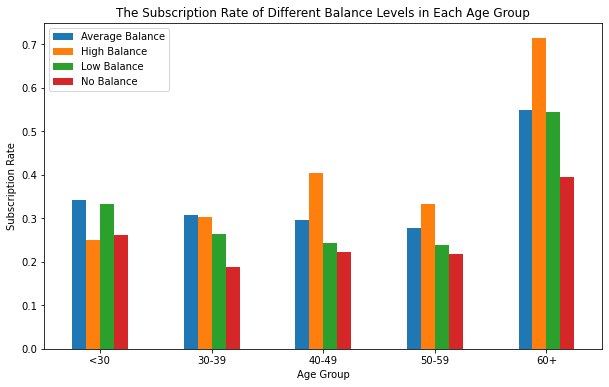

In [30]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

**Insights: target older clients with high balance levels**

While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription. 

In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.

* The graph tells the same story regarding the subscription rate for different age groups: **the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30** also have a distinguishable higher subscription rate than those of other age groups. 


* Furthermore, **the effect of balance levels on subscription decision is applicable to each individual age group**: every age group shares a common trend that the percentage of subscription increases with balance. 

In sum, the bank should **prioritize its telemarketing to clients who are above 60 years old and have positive balances**, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is **young clients with positive balances**, who showed high subscription rates between 15% and 20%.

### 4.4 Visualize the subscription rate by job

In [31]:
count_job_response_pct = pd.crosstab(dataset7['response'],dataset7['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

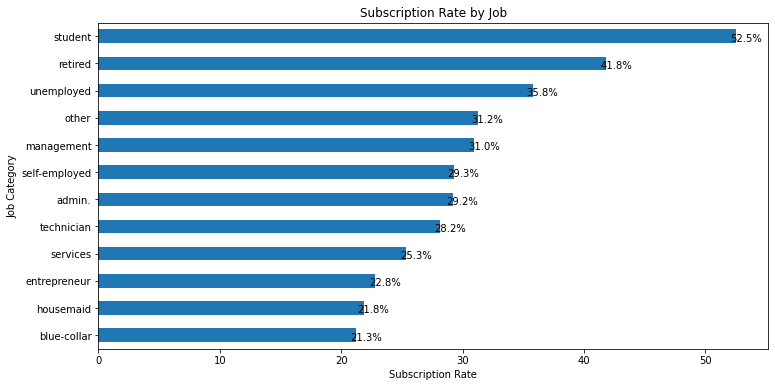

In [32]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

**Insights: target students and retired clients**

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older. 

In [33]:
dataset7

Unnamed: 0  age           job   marital  education default  balance  \
5               7   42  entrepreneur  divorced   tertiary     yes        2   
10             12   53    technician   married  secondary      no        6   
12             15   51       retired   married    primary      no      229   
19             23   25      services   married  secondary      no       50   
25             29   36    technician    single  secondary      no      265   
...           ...  ...           ...       ...        ...     ...      ...   
40836       45205   25    technician    single  secondary      no      505   
40837       45206   51    technician   married   tertiary      no      825   
40838       45207   71       retired  divorced    primary      no     1729   
40839       45208   72       retired   married  secondary      no     5715   
40840       45209   57   blue-collar   married  secondary      no      668   

      housing loan  day  ... duration  campaign  pdays  previous  poutcome  \
5         yes   no    5  ...     0.11         1     -1         0   unknown   
10        yes   no    5  ...     0.14         1     -1         0   unknown   
12        yes   no    5  ...     0.10         1     -1         0   unknown   
19        yes   no    5  ...     0.10         1     -1         0   unknown   
25        yes  yes    5  ...     0.10         1     -1         0   unknown   
...       ...  ...  ...  ...      ...       ...    ...       ...       ...   
40836      no  yes   17  ...     0.11         2     -1         0   unknown   
40837      no   no   17  ...     0.27         3     -1         0   unknown   
40838      no   no   17  ...     0.13         2     -1         0   unknown   
40839      no   no   17  ...     0.31         5    184         3   success   
40840      no   no   17  ...     0.14         4     -1         0   unknown   

      response response_binary  month_int  age_group    balance_group  
5           no               0        5.0       40.0      low balance  
10          no               0        5.0       50.0      low balance  
12          no               0        5.0       50.0      low balance  
19          no               0        5.0       20.0      low balance  
25          no               0        5.0       30.0      low balance  
...        ...             ...        ...        ...              ...  
40836      yes               1       11.0       20.0      low balance  
40837      yes               1       11.0       50.0      low balance  
40838      yes               1       11.0       60.0  average balance  
40839      yes               1       11.0       60.0     high balance  
40840       no               0       11.0       50.0      low balance  

[10394 rows x 21 columns]

In [34]:
dataset7['job'].unique()

array(['entrepreneur', 'technician', 'retired', 'services', 'blue-collar',
       'admin.', 'self-employed', 'management', 'student', 'housemaid',
       'unemployed', 'other'], dtype=object)

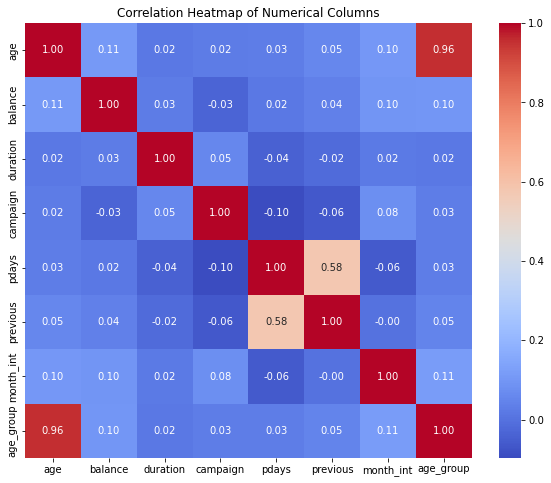

In [35]:
numerical_columns = dataset7[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous','month_int','age_group']]

# Calculating correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [36]:
marital_mapping = {'entrepreneur':0, 'technician':1, 'retired':2, 'services':3, 'blue-collar':4,
       'admin.':5, 'self-employed':6, 'management':7, 'student':8, 'housemaid':9,
       'unemployed':10, 'other':11}

# Replace the categorical values with the assigned integer values
dataset7['job'] = dataset7['job'].map(marital_mapping)

In [37]:
dataset7['marital'].unique()

array(['divorced', 'married', 'single'], dtype=object)

In [38]:
marital_mapping = {'single': 0, 'married': 1, 'divorced': 2}

# Replace the categorical values with the assigned integer values
dataset7['marital'] = dataset7['marital'].map(marital_mapping)

In [39]:
dataset7['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [40]:
education_mapping = {'tertiary': 0, 'secondary': 1, 'primary': 2}

# Replace the categorical values with the assigned integer values
dataset7['education'] = dataset7['education'].map(education_mapping)

In [41]:
dataset7['response'].unique()

array(['no', 'yes'], dtype=object)

In [42]:
response_mapping = {'no': 0,  'yes': 1}

# Replace the categorical values with the assigned integer values
dataset7['response'] = dataset7['response'].map(response_mapping)

In [43]:
dataset7

Unnamed: 0  age  job  marital  education default  balance housing loan  \
5               7   42    0        2          0     yes        2     yes   no   
10             12   53    1        1          1      no        6     yes   no   
12             15   51    2        1          2      no      229     yes   no   
19             23   25    3        1          1      no       50     yes   no   
25             29   36    1        0          1      no      265     yes  yes   
...           ...  ...  ...      ...        ...     ...      ...     ...  ...   
40836       45205   25    1        0          1      no      505      no  yes   
40837       45206   51    1        1          0      no      825      no   no   
40838       45207   71    2        2          2      no     1729      no   no   
40839       45208   72    2        1          1      no     5715      no   no   
40840       45209   57    4        1          1      no      668      no   no   

       day  ... duration  campaign  pdays  previous  poutcome response  \
5        5  ...     0.11         1     -1         0   unknown        0   
10       5  ...     0.14         1     -1         0   unknown        0   
12       5  ...     0.10         1     -1         0   unknown        0   
19       5  ...     0.10         1     -1         0   unknown        0   
25       5  ...     0.10         1     -1         0   unknown        0   
...    ...  ...      ...       ...    ...       ...       ...      ...   
40836   17  ...     0.11         2     -1         0   unknown        1   
40837   17  ...     0.27         3     -1         0   unknown        1   
40838   17  ...     0.13         2     -1         0   unknown        1   
40839   17  ...     0.31         5    184         3   success        1   
40840   17  ...     0.14         4     -1         0   unknown        0   

       response_binary  month_int  age_group    balance_group  
5                    0        5.0       40.0      low balance  
10                   0        5.0       50.0      low balance  
12                   0        5.0       50.0      low balance  
19                   0        5.0       20.0      low balance  
25                   0        5.0       30.0      low balance  
...                ...        ...        ...              ...  
40836                1       11.0       20.0      low balance  
40837                1       11.0       50.0      low balance  
40838                1       11.0       60.0  average balance  
40839                1       11.0       60.0     high balance  
40840                0       11.0       50.0      low balance  

[10394 rows x 21 columns]

In [44]:
dataset7['housing'].unique()

array(['yes', 'no'], dtype=object)

In [45]:
housing_mapping = {'no': 0,  'yes': 1}

# Replace the categorical values with the assigned integer values
dataset7['housing'] = dataset7['housing'].map(housing_mapping)

In [46]:
dataset7['loan'].unique()

array(['no', 'yes'], dtype=object)

In [47]:
loan_mapping = {'no': 0,  'yes': 1}

# Replace the categorical values with the assigned integer values
dataset7['loan'] = dataset7['loan'].map(loan_mapping)

In [48]:
dataset7['balance_group'].unique()

array(['low balance', 'no balance', 'average balance', 'high balance'],
      dtype=object)

In [49]:
balance_mapping = {'no balance': 0,  'low balance': 1,'average balance':2,'high balance':3}

# Replace the categorical values with the assigned integer values
dataset7['balance_group'] = dataset7['balance_group'].map(balance_mapping)

<AxesSubplot:>

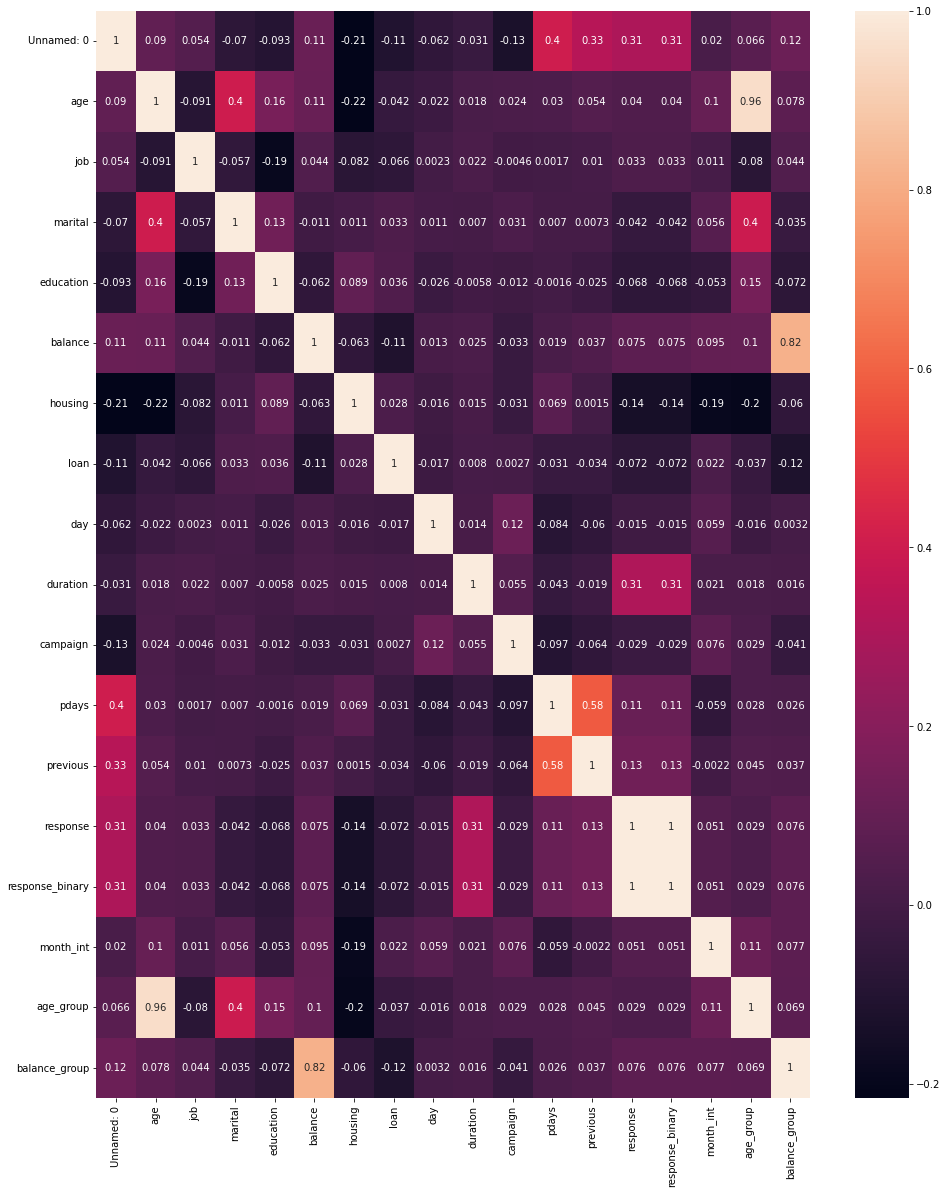

In [50]:
plt.figure(figsize=(16,20))

sns.heatmap(dataset7.corr(),annot=True)

In [51]:
dataset7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10394 entries, 5 to 40840
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10394 non-null  int64  
 1   age              10394 non-null  int64  
 2   job              10394 non-null  int64  
 3   marital          10394 non-null  int64  
 4   education        10394 non-null  int64  
 5   default          10394 non-null  object 
 6   balance          10394 non-null  int64  
 7   housing          10394 non-null  int64  
 8   loan             10394 non-null  int64  
 9   day              10394 non-null  int64  
 10  month            10394 non-null  object 
 11  duration         10394 non-null  float64
 12  campaign         10394 non-null  int64  
 13  pdays            10394 non-null  int64  
 14  previous         10394 non-null  int64  
 15  poutcome         10394 non-null  object 
 16  response         10394 non-null  int64  
 17  response_binary  

In [52]:
y = dataset7['response']
x = dataset7.drop(['response','default','balance','month','age','poutcome','Unnamed: 0','day','duration','pdays','response_binary'],axis = 1)
print(x.shape)
print(y.shape)

(10394, 10)
(10394,)


In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy*100,"%")

Accuracy of Logistic Regression: 73.3044733044733 %


In [60]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8315 entries, 1164 to 10688
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job            8315 non-null   int64  
 1   marital        8315 non-null   int64  
 2   education      8315 non-null   int64  
 3   housing        8315 non-null   int64  
 4   loan           8315 non-null   int64  
 5   campaign       8315 non-null   int64  
 6   previous       8315 non-null   int64  
 7   month_int      8315 non-null   float64
 8   age_group      8315 non-null   float64
 9   balance_group  8315 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 714.6+ KB
